"I edited the Data Cleaning section to add some visualizations that may be needed for presentation slides.



In [12]:
# import Libraries
import pandas as pd
from scipy import stats

In [13]:
# load dataset
df = pd.read_csv("diabetes_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [14]:


# Renaming columns
df.rename(columns={
    'gender': 'Gender',
    'age': 'Age',
    'bmi': 'BMI',
    'HbA1c_level': 'HbA1c Level',
    'blood_glucose_level': 'Blood Glucose Level',
    'diabetes': 'Diabetes'
}, inplace=True)


df.head()


,Gender,Age,hypertension,heart_disease,smoking_history,BMI,HbA1c Level,Blood Glucose Level,Diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [15]:
# remove rows with missing values
df.dropna(inplace=True)

In [16]:
# drop unnecessary columns
df.drop(['smoking_history','hypertension','heart_disease'], axis=1, inplace=True)

In [17]:
# remove rows where age is below 18
df = df[df['Age'] >= 18.0]
df = df[df['Age'] <= 75.0]

In [18]:

df.head()


,Gender,Age,BMI,HbA1c Level,Blood Glucose Level,Diabetes
1,Female,54.0,27.32,6.6,80,0
2,Male,28.0,27.32,5.7,158,0
3,Female,36.0,23.45,5.0,155,0
5,Female,20.0,27.32,6.6,85,0
6,Female,44.0,19.31,6.5,200,1


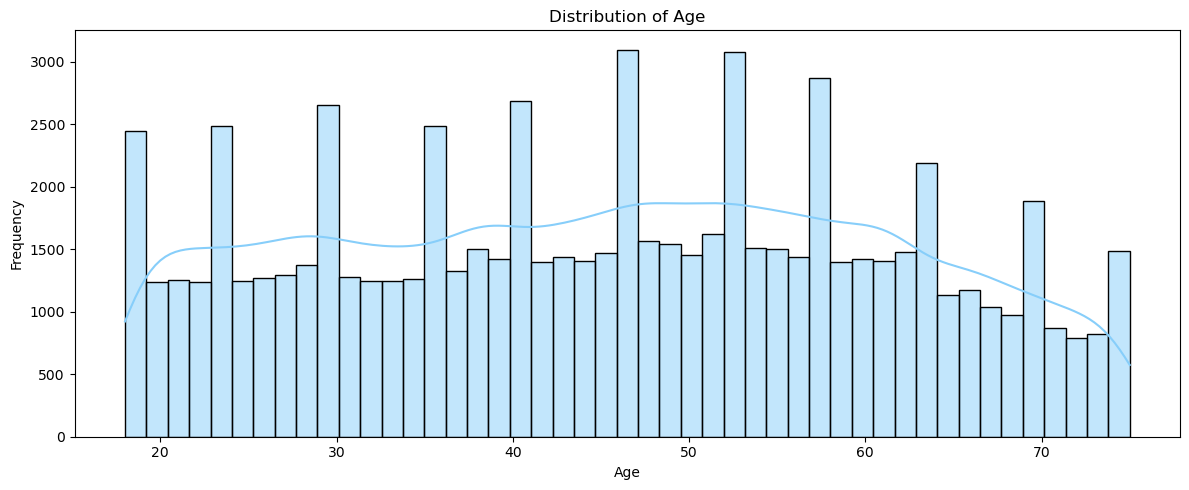

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Colors: with light blue and orange
custom_palette = ['#87CEFA', '#FFA07A']


col = 'Age'

plt.figure(figsize=(12, 5))
sns.histplot(df[col], kde=True, color=custom_palette[0])
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()





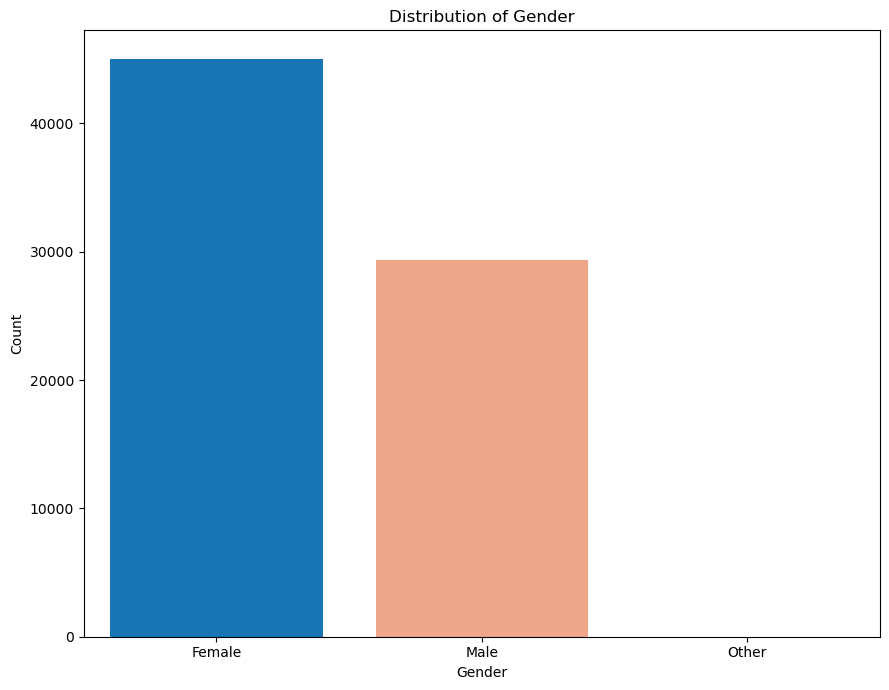

In [21]:
# # Colors: with light blue and orange
custom_palette = ['#007ACC', '#FFA07A']


col = 'Gender'

plt.figure(figsize=(9, 7))
sns.countplot(x=col, data=df, palette=custom_palette)
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Count')
plt.tight_layout()
plt.show()



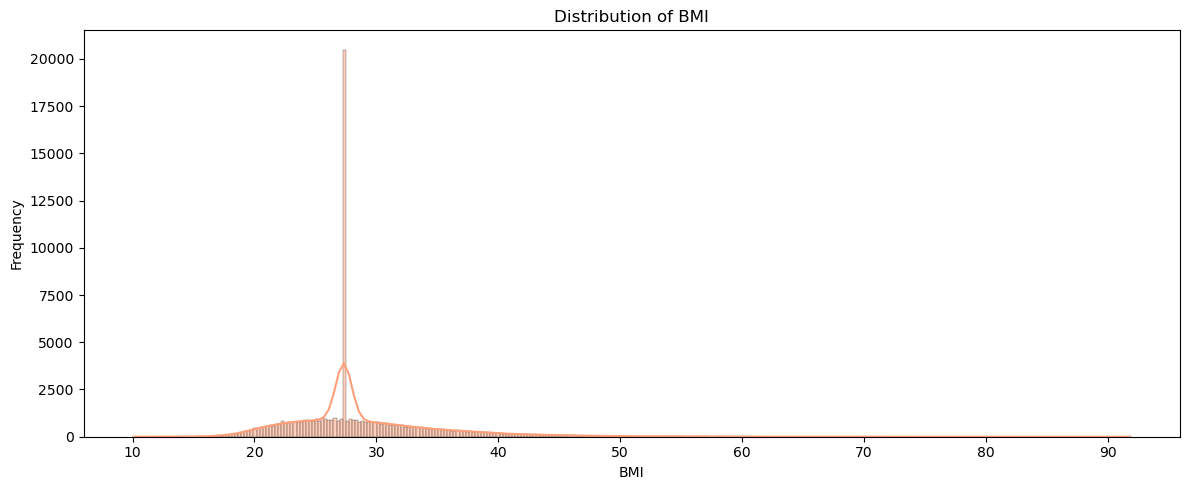

In [46]:
custom_palette = ['#007ACC', '#FFA07A']
col = 'BMI'

plt.figure(figsize=(12, 5))
sns.histplot(df[col], kde=True, color=custom_palette[1])
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

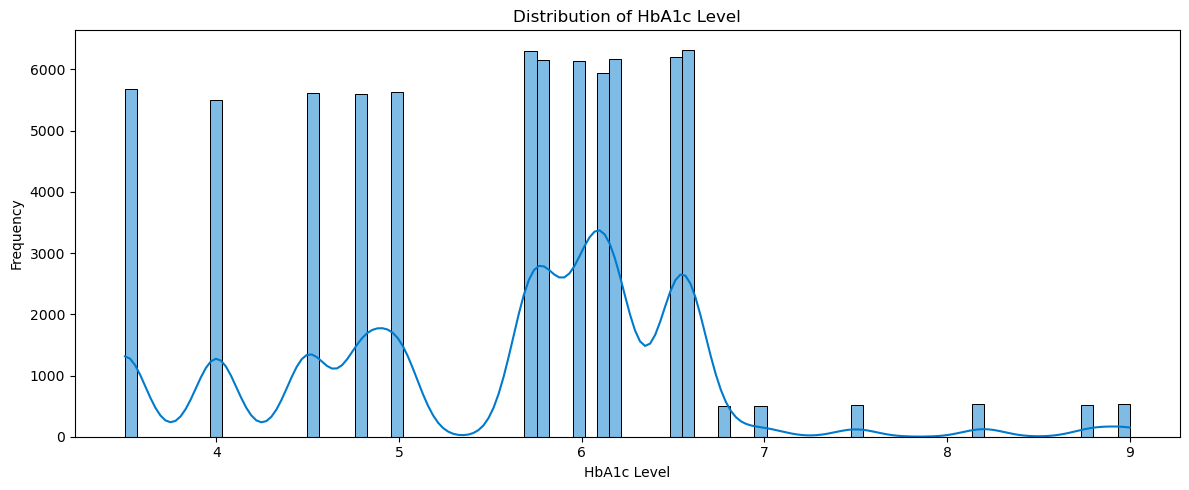

In [47]:
custom_palette = ['#007ACC', '#FFA07A']

col = 'HbA1c Level'

plt.figure(figsize=(12, 5))
sns.histplot(df[col], kde=True, color=custom_palette[0])
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

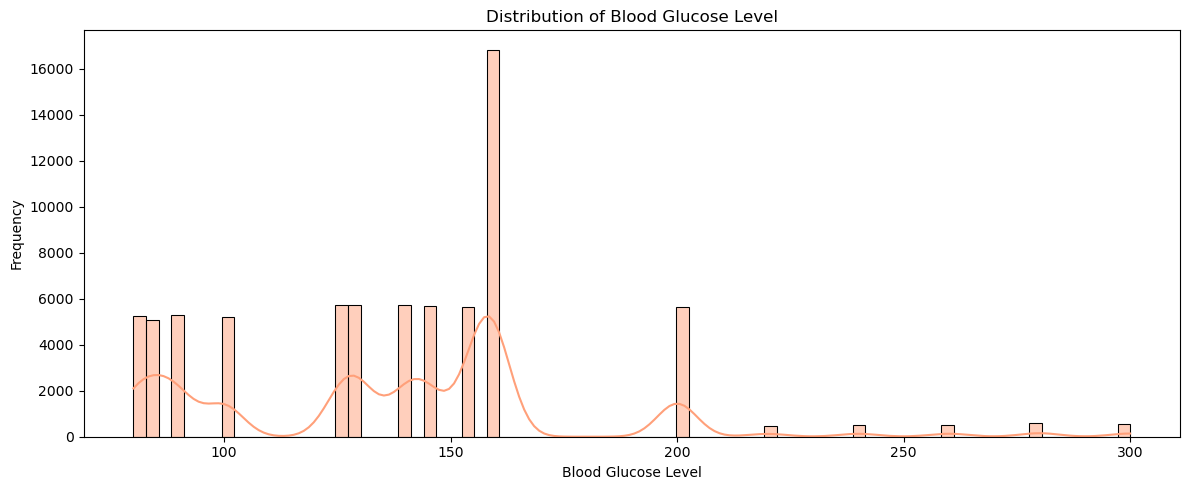

In [48]:
custom_palette = ['#007ACC', '#FFA07A']

col = 'Blood Glucose Level'

plt.figure(figsize=(12, 5))
sns.histplot(df[col], kde=True, color=custom_palette[1])
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

This might be useful in introduction slides

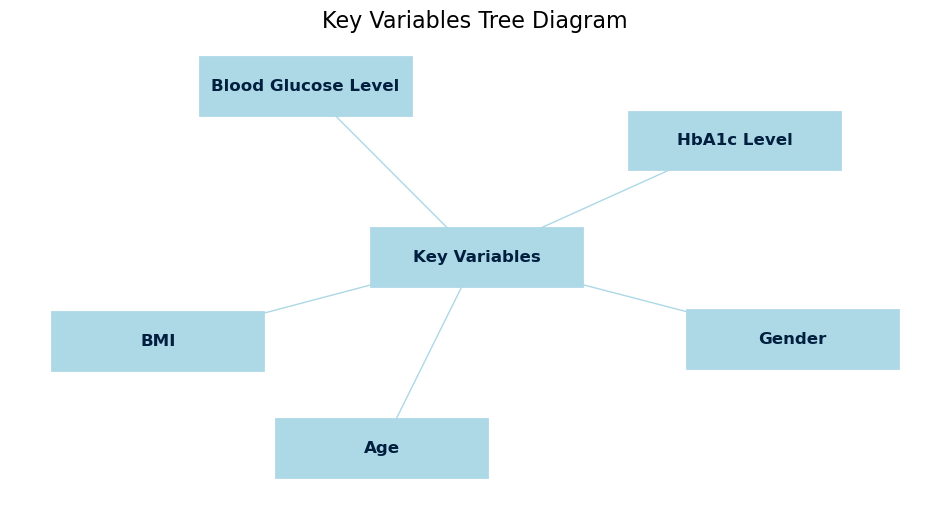

In [24]:
import matplotlib.pyplot as plt
import networkx as nx

# Define light blue and dark blue colors
light_blue = 'lightblue'
dark_blue = '#001f3f'  

# Define the key variables as the top nodes
key_variables = ["Key Variables"]

# Define the subcategories (variables) under each key variable as a dictionary
subcategories = {
    "Gender": ["Gender"],
    "Age": ["Age"],
    "Body Mass Index (BMI)": ["BMI"],
    "HbA1c Level": ["HbA1c Level"],
    "Blood Glucose Level": ["Blood Glucose Level"]
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes for key variables
G.add_node(key_variables[0])

# Add subcategories as child nodes under key variables
for key_variable, variables in subcategories.items():
    G.add_nodes_from(variables)
    for variable in variables:
        G.add_edge(key_variables[0], variable)

# Set node positions for better layout
pos = nx.spring_layout(G, seed=42)

# Increase the width and height for rectangular nodes
node_width = 0.6  
node_height = 0.3 

# Adjust the y-coordinate of "BMI" node to move it lower
pos["BMI"] = (pos["BMI"][0], pos["BMI"][1] - 0.4) 

# Draw the tree diagram with rectangular nodes
plt.figure(figsize=(12, 6))

# Draw nodes as rectangles with the boxstyle='round,pad=0.5' style
for node in G.nodes():
    if node == "Key Variables":
        color = light_blue
    else:
        color = dark_blue
    x, y = pos[node]
    plt.gca().add_patch(plt.Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                                      linewidth=2, edgecolor=light_blue, facecolor=light_blue))
    plt.text(x, y, node, ha='center', va='center', fontsize=12, color=dark_blue, fontweight='bold')

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color=light_blue, arrows=False)

plt.title("Key Variables Tree Diagram", fontsize=16)
plt.axis('off')

# Show the diagram
plt.show()

In [9]:
# Save cleaned DataFrame to CSV
df.to_csv('cleaned_data.csv', index=False)

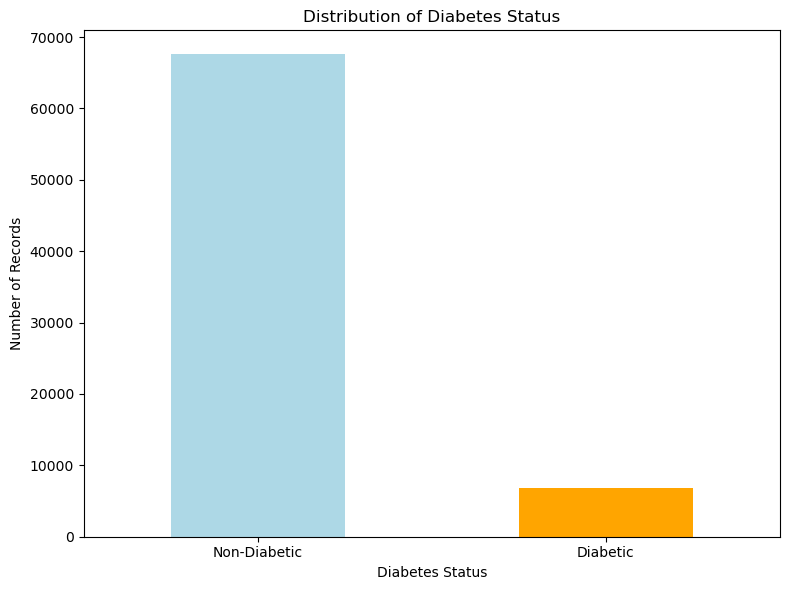

In [10]:
import matplotlib.pyplot as plt
import pandas as pd


# Count the number of instances in each category of the 'diabetes' column
diabetes_counts = df['Diabetes'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(8, 6))
diabetes_counts.plot(kind='bar', color=['#ADD8E6', '#FFA500'])  
plt.title('Distribution of Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Number of Records')
plt.xticks(ticks=range(len(diabetes_counts)), labels=['Non-Diabetic', 'Diabetic'], rotation=0)
plt.tight_layout()
plt.show()


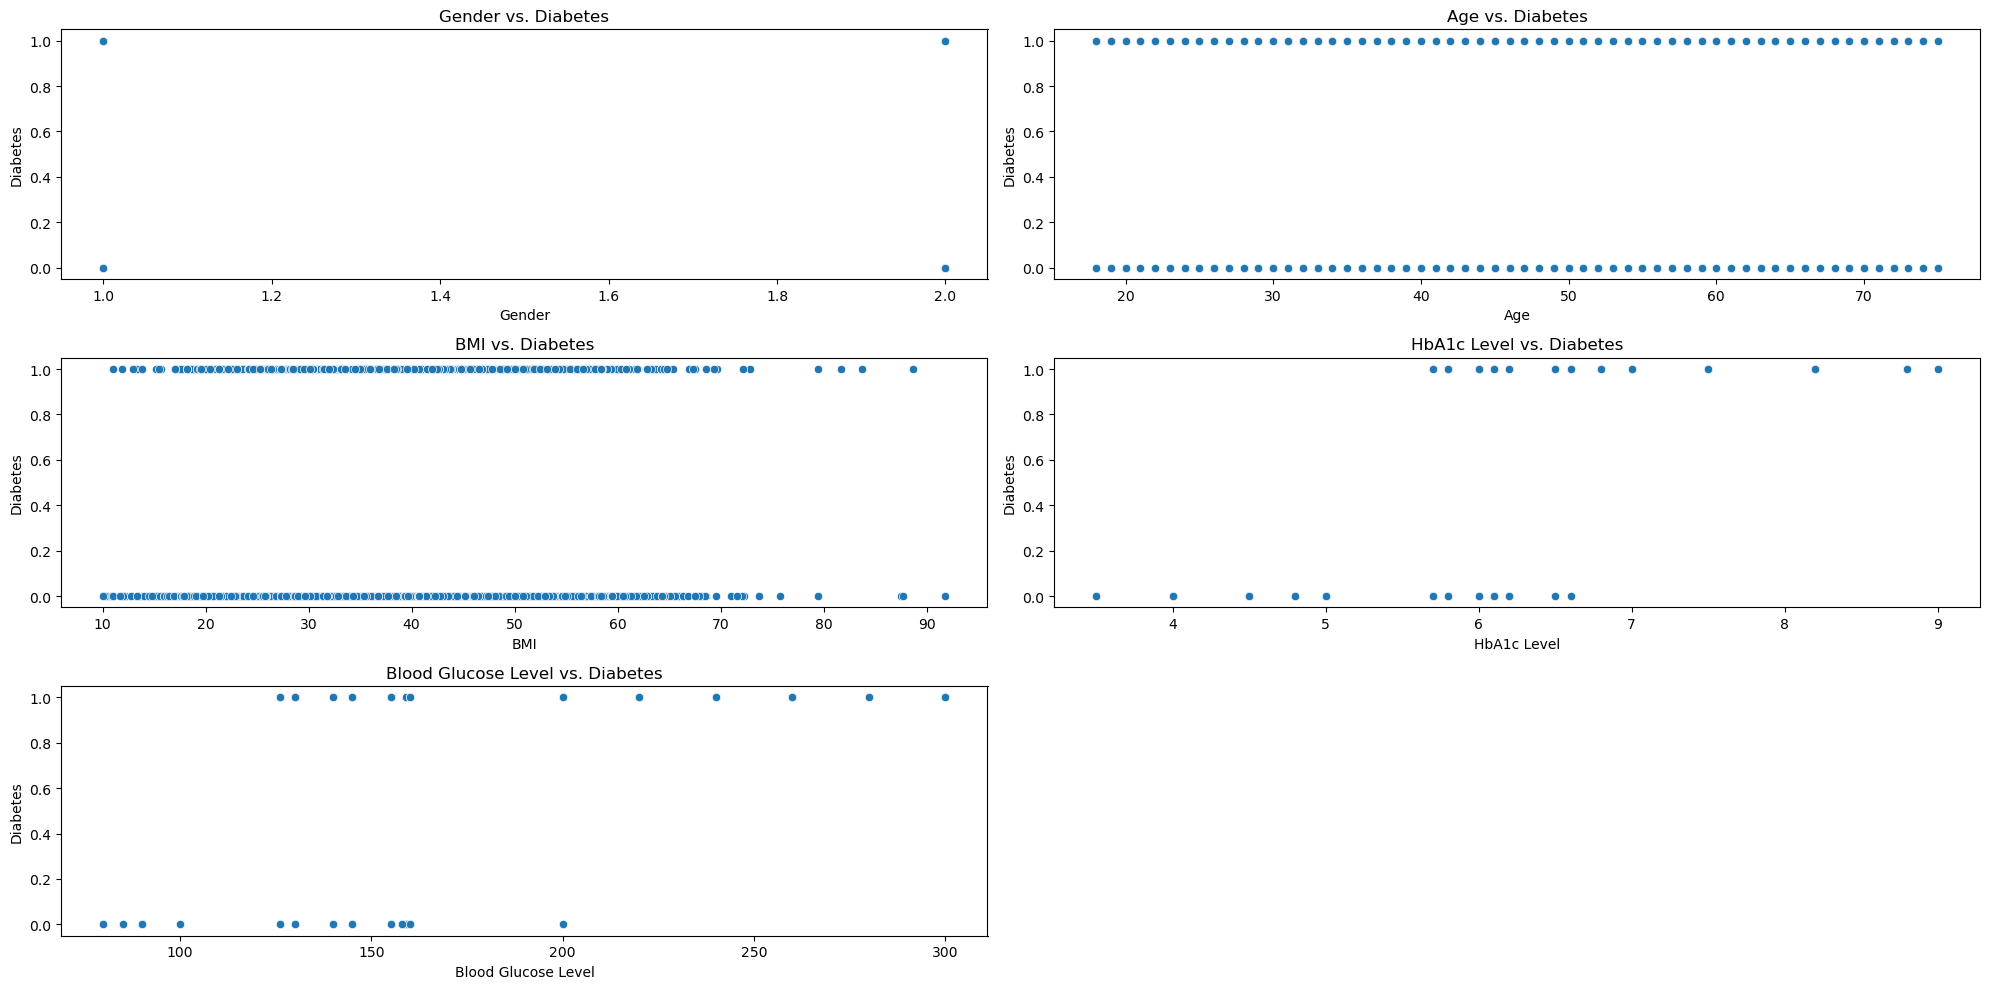

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from a CSV file
df = pd.read_csv('cleaned_data.csv')  

# Map gender to numerical values
gender_mapping = {'Male': 1, 'Female': 2}
df['Gender'] = df['Gender'].map(gender_mapping)

# Remove rows with NaN values
df = df.dropna()


target_variable = 'Diabetes'

# List of features 
features = df.columns.drop(target_variable)

# Setting up the matplotlib figure
plt.figure(figsize=(20, 10))

# Looping through and creating a scatter plot for each feature
for i, feature in enumerate(features):
    plt.subplot(3, (len(features) + 2) // 3, i + 1)  
    sns.scatterplot(x=df[feature], y=df[target_variable])
    plt.title(f'{feature} vs. {target_variable}')

plt.tight_layout()
plt.show()


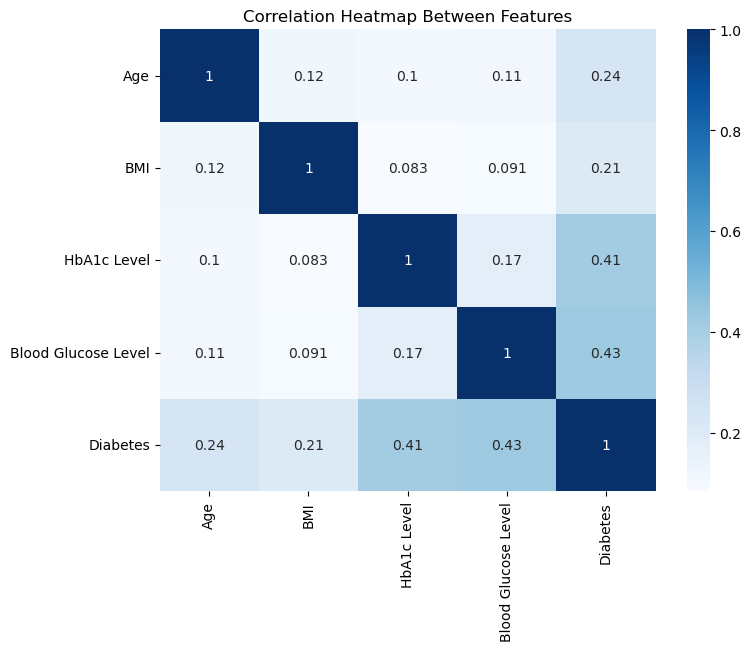

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("cleaned_data.csv")  

# Heatmap for Feature Correlation 
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr(numeric_only=True)  
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')  
plt.title('Correlation Heatmap Between Features')
plt.show()


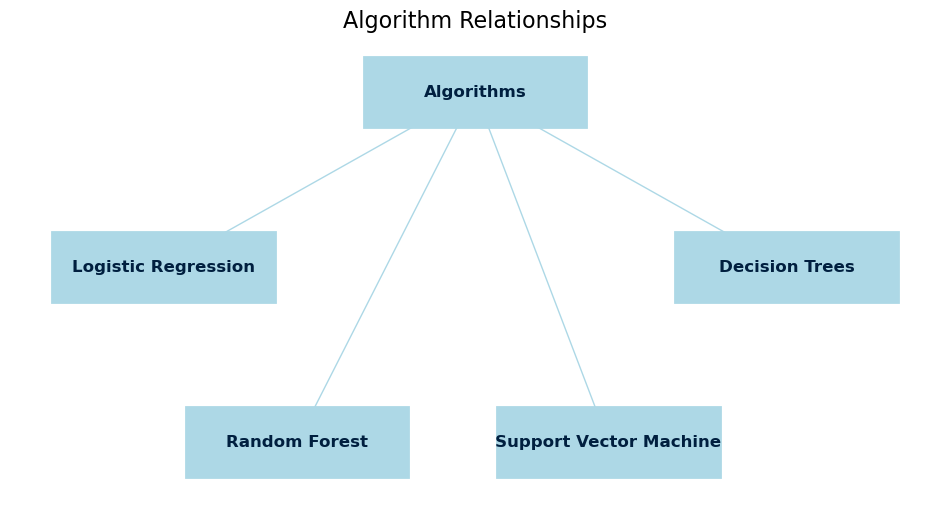

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define nodes for algorithms
algorithms = ["Algorithms", "Logistic Regression", "Random Forest", "Support Vector Machine", "Decision Trees"]
G.add_nodes_from(algorithms)

# Define edges to connect Algorithms to individual algorithms
edges = [
    ("Algorithms", "Logistic Regression"),
    ("Algorithms", "Random Forest"),
    ("Algorithms", "Support Vector Machine"),
    ("Algorithms", "Decision Trees")  
]
G.add_edges_from(edges)

# Set node positions for better layout
pos = {
    "Algorithms": (1.5, 0),
    "Logistic Regression": (-2, -0.5),
    "Random Forest": (-.5, -1),
    "Support Vector Machine": (3, -1),
    "Decision Trees": (5, -0.5)
}

# Increase the width and height for rectangular nodes
node_width = 2.5
node_height = 0.2

# Draw the tree diagram with rectangular nodes
plt.figure(figsize=(12, 6))

# Draw nodes as rectangles with the boxstyle='round,pad=0.5' style
for node in G.nodes():
    x, y = pos[node]
    plt.gca().add_patch(plt.Rectangle((x - node_width / 2, y - node_height / 2), node_width, node_height,
                                      linewidth=2, edgecolor=light_blue, facecolor=light_blue))
    plt.text(x, y, node, ha='center', va='center', fontsize=12, color=dark_blue, fontweight='bold')

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color=light_blue, arrows=False)

plt.title("Algorithm Relationships", fontsize=16)
plt.axis('off')

# Show the diagram
plt.show()


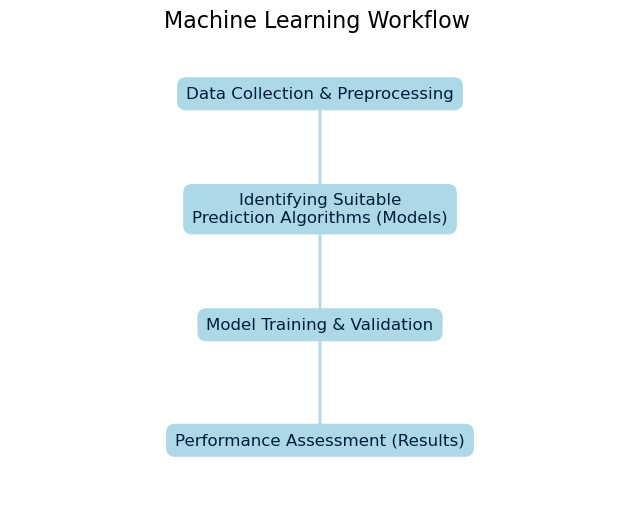

In [2]:
import matplotlib.pyplot as plt

# Define light blue and dark blue colors
light_blue = 'lightblue'
dark_blue = '#001f3f' 


stages = [
    "Performance Assessment (Results)",
    "Model Training & Validation",
    "Identifying Suitable\nPrediction Algorithms (Models)",
    "Data Collection & Preprocessing"
]

# Create a blank figure
fig, ax = plt.subplots(figsize=(8, 6))

# Create arrows between stages 
arrowprops = dict(arrowstyle="->", linewidth=2, color=light_blue)
for i in range(len(stages) - 1):
    ax.annotate("", xy=(0.5, i), xytext=(0.5, i + 1), arrowprops=arrowprops)

# Add stage labels with larger boxes and dark blue text and background
for i, stage in enumerate(stages):
    ax.text(
        0.5, i, stage, ha='center', va='center', fontsize=12,
        bbox=dict(boxstyle='round,pad=0.5', edgecolor=light_blue, facecolor=light_blue),
        color=dark_blue  
    )

# Set axis limits and hide axes
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, len(stages) - 0.5)
ax.axis('off')

# Set the title
plt.title("Machine Learning Workflow ", fontsize=16)


plt.show()
